In [1]:
import pandas as pd

## Article

### Education Spending: How is Education Financed, How Much Do We Spend on It, and What Are the Returns?

**Authors**: Max Roser and Esteban Ortiz-Ospina

**Date**: June 23, 2016

 *Education Spendingd(cation](https://ourworldindata.org/financing-education)
cation)


#### Preview of article

In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://ourworldindata.org/financing-education'

response = requests.get(url)
response.encoding = response.apparent_encoding

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    article_content = []

    if soup.find('h1'):
        article_content.append(soup.find('h1').get_text())

    for header in soup.find_all(['h2', 'h3', 'h4', 'h5', 'h6']):
        article_content.append(header.get_text())

    for paragraph in soup.find_all('p'):
        article_content.append(paragraph.get_text())

    for content in article_content:
        print(content)
else:
    print('ERROR:', response.status_code)

Education Spending
How is education financed? How much do we spend on it? What are the returns?
When did the provision of education first become a public policy priority?
How did the US finance the expansion of public education?
How did France finance the expansion of public education?
In the US growth in education expenditure was characterized by growth specifically in the public sector
When did the expansion of basic education become a global phenomenon?
Education inequality is falling around the world
Education inequality can decline rapidly across all levels of education – South Korea is an example
Is funding for education expanding?
Is additional funding for education taking resources from other sectors?
European countries tend to assign a lower share of public budgets to education, relative to the amount of their income that is devoted to education
In European countries the weight of primary education within total education spending is lower than in other countries
In high-income

#### The chart data in the article that we need

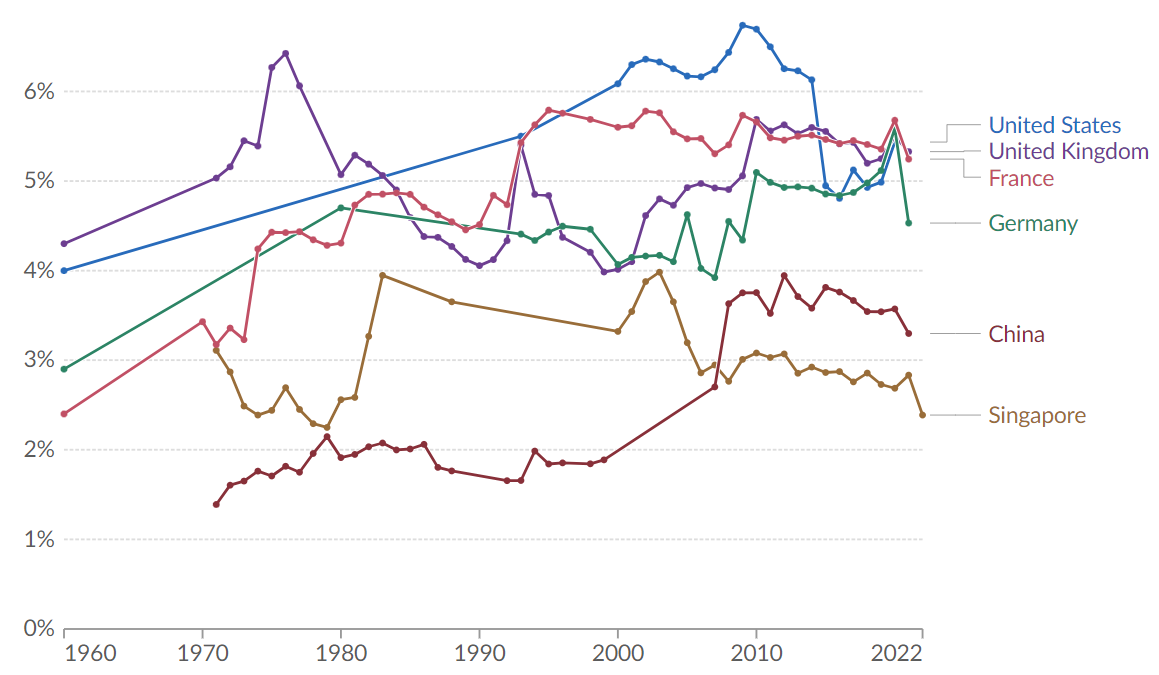

#### SVG Data Process

#### OCR Data Process

In [3]:
### We extract data on education expenditure from the charts in the article by Max Roser and Esteban Ortiz-Ospina using OCR methods
Expenditure_on_Education_raw = pd.read_csv('Expenditure_on_Education_raw.csv')
Expenditure_on_Education_raw.head()

,1970.989032369146,0.013901108595352013
0,1971.129804,0.014041
1,1971.261777,0.014386
2,1971.393750,0.014645
3,1971.516925,0.014909
4,1971.640100,0.015176


In [4]:
### Round the first column to obtain the years as integers
Expenditure_on_Education_raw.columns = ['Year','Expenditure on Education']
Expenditure_on_Education_raw['Year'] = Expenditure_on_Education_raw['Year'].apply(int)
Expenditure_on_Education_raw.head()

,Year,Expenditure on Education
0,1971,0.014041
1,1971,0.014386
2,1971,0.014645
3,1971,0.014909
4,1971,0.015176


In [5]:
### We average the data for each duplicate year since more than one data for the same year are extracted and we only need one data each year
Expenditure_on_Education = Expenditure_on_Education_raw.groupby('Year')['Expenditure on Education'].mean().reset_index()
Expenditure_on_Education.head()

,Year,Expenditure on Education
0,1971,0.015041
1,1972,0.016205
2,1973,0.016971
3,1974,0.017545
4,1975,0.017408


#### Data 